In [1]:
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Modify the position of a dog in an image by manipulating its coordinates using NumPY

In [3]:
#apply following filter on image,
#1. blur image - gaussina filter and simple blur filter
#2. apply filter for edge detection
#3. change brightness and contrast both mannualy and by using  a library

In [4]:
#take 2 images 1st image of dog and second image of horse and generate 2 new images where heads of animals is swaped

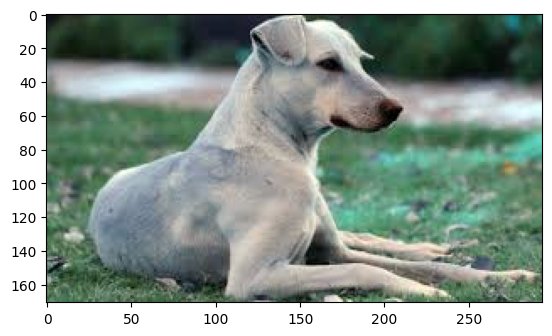

In [5]:
img = cv.imread("dog.jpg")
plt.imshow(img)

# TASK 1:
Modify the position of a dog in an image by manipulating its coordinates using NumPY

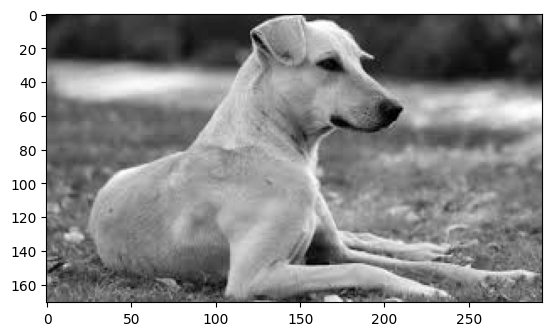

In [6]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap= 'gray')
grayf = gray.copy()
sft = gray.copy()

In [7]:
gray.shape

(171, 294)

In [8]:
row,col = gray.shape
for r in range(row):
    for c in range(int(col/2)):
        temp = grayf[r][c]
        grayf[r][c] = grayf[r][col-c-1]
        grayf[r][col-c-1] = temp
        


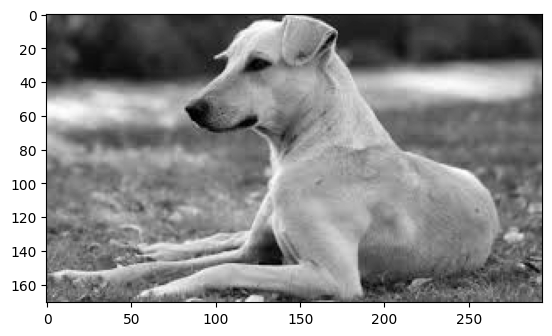

In [9]:
plt.imshow(grayf, cmap='gray')

In [10]:
row,col = gray.shape
sft = gray.copy()
for r in range(row):
    for c in range(col-51):
        sft[r][c] = sft[r][c+50]

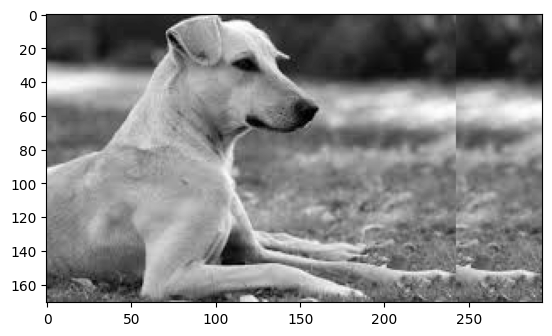

In [11]:
plt.imshow(sft, cmap='gray')

In [12]:
rect = gray.copy()

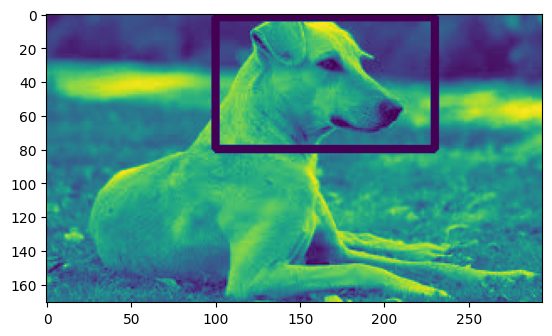

In [14]:
cv.rectangle(rect, (100,2),(230,80),(0,0,0),3)
plt.imshow(rect)

# TASK 2: 
apply following filter on image,
1. blur image - gaussina filter and simple blur filter
2. apply filter for edge detection
3. change brightness and contrast both mannualy and by using  a library

In [15]:
avg = gray.copy()

In [16]:
avg = avg.astype(np.float64)
row, col = avg.shape
updated_avg = avg.copy()
for r in range(1, row - 1):
    for c in range(1, col - 1):
        updated_avg[r][c] = (avg[r - 1][c] + avg[r][c - 1] + avg[r + 1][c] + avg[r][c + 1]) / 4
avg = updated_avg

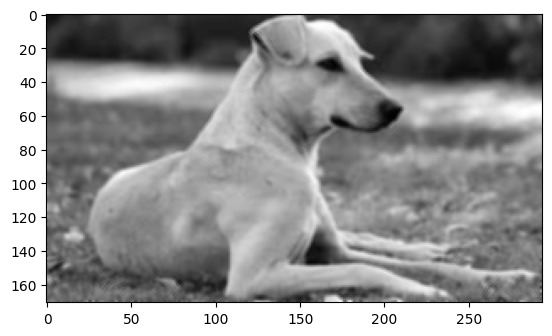

In [17]:
plt.imshow(avg,cmap="gray")

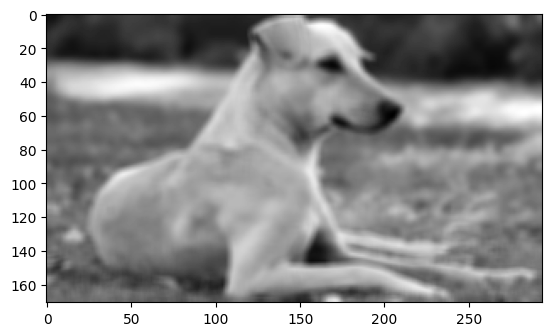

In [18]:
# Apply Simple Blur Filter (Average Filter)
blurred_simple = cv.blur(gray, (5, 5))  # Kernel size (5x5)

# Apply Gaussian Blur Filter
blurred_gaussian = cv.GaussianBlur(gray, (5, 5), sigmaX=2) 

plt.imshow(blurred_simple, cmap= "gray")


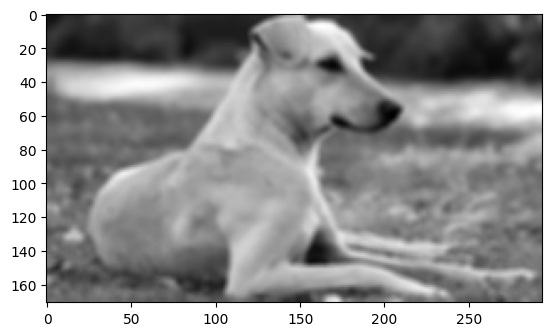

In [20]:
plt.imshow(blurred_gaussian, cmap="gray")

Increasing brightness

In [21]:
img_rgb = cv.imread("cat.png")

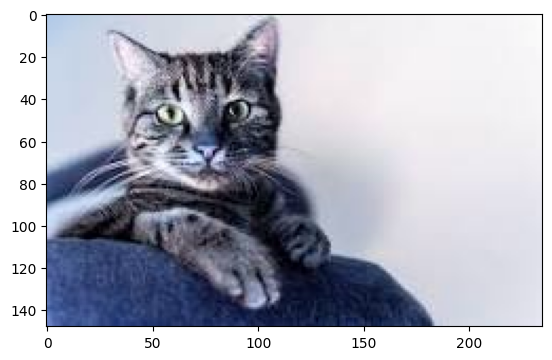

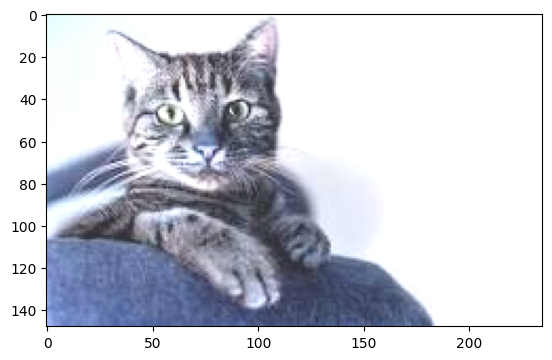

In [23]:
image = img_rgb.copy()
bright_incr = 50

plt.imshow(image)
plt.show()
height = image.shape[0]
width = image.shape[1]
for i in range(height):
    for j in range(width):
        for k in range(3):
            image[i][j][k]=min(image[i][j][k]+bright_incr,255)
plt.imshow(image)

# Inbuilt Function
brightened_image = cv.add(image, bright_incr)

decrease brightness 

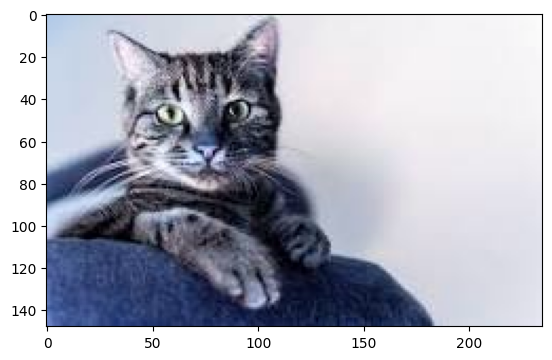

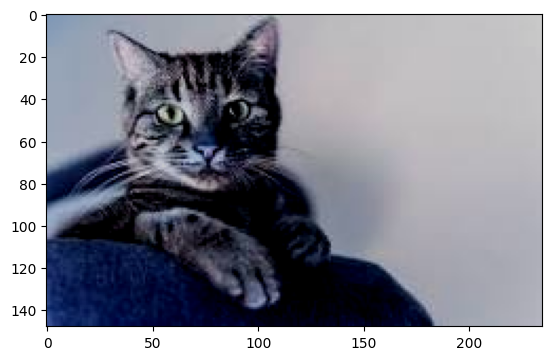

In [24]:
image = img_rgb.copy()
bright_dec = 50

plt.imshow(image)
plt.show()

for i in range(height):
    for j in range(width):
        for k in range(3):
            image[i][j][k]=max(image[i][j][k]-bright_incr,0)
plt.imshow(image)
        
# Inbuilt Function
contrasted_image = cv.subtract(image, bright_dec) 

sharpning

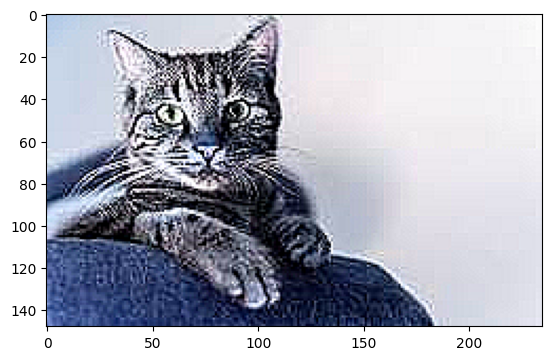

In [26]:
sharpen = np.array([[0, -1, 0],
                              [-1, 5, -1],
                              [0, -1, 0]])
sharpened = cv.filter2D(img_rgb, -1, sharpen)
plt.imshow(sharpened)
plt.show()

edge detection

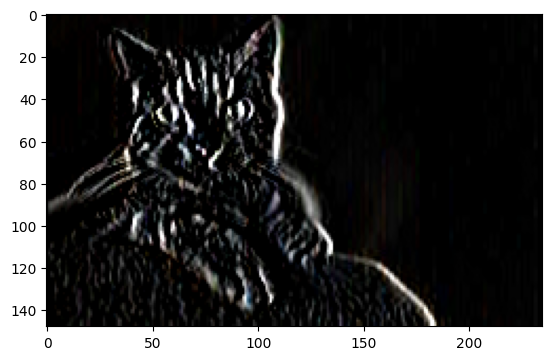

In [28]:
ver_kernel = np.array([[-1, 0, 1],
                   [-1, 0, 1],
                   [-1, 0, 1]])

ver_edg = cv.filter2D(img_rgb, ddepth=-1, kernel=ver_kernel)
plt.imshow(ver_edg)

# task 3: head swap

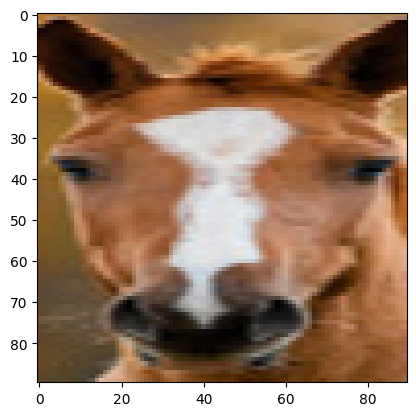

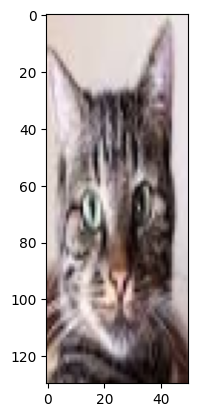

In [29]:
cat =cv.imread('cat.png')
horse = cv.imread('horse.png')
cat = cv.cvtColor(cat, cv.COLOR_BGR2RGB)
horse = cv.cvtColor(horse, cv.COLOR_BGR2RGB)
cat_face = cat[:90,30:120]
horse_face= horse[30:160,150:200] 
horse_face_resize=cv.resize(horse_face,(90,90))
cat_face_resize=cv.resize(cat_face,(50,130))

plt.imshow(horse_face_resize)
plt.show()
plt.imshow(cat_face_resize)


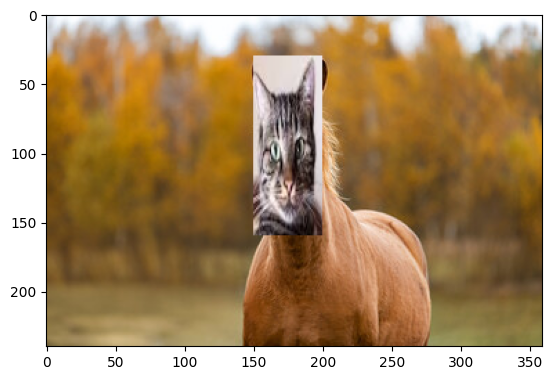

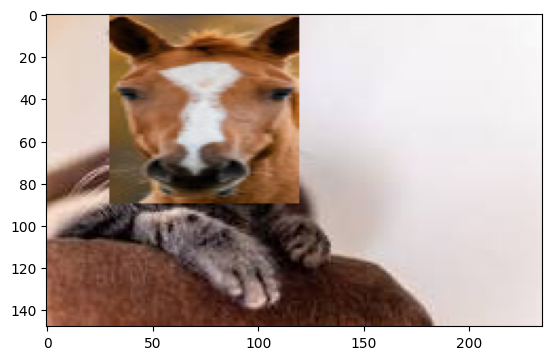

In [30]:
cat[:90,30:120] =horse_face_resize
horse[30:160,150:200] =cat_face_resize
plt.imshow(horse)
plt.show()
plt.imshow(cat)